# Universal Kriging with Uncertainties Example

## Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from kriging import kriging
print(f"kriging v{kriging._VERSION}")

kriging v2.1


In [2]:
# random seed for reproducibility
np.random.seed(1234)

In [3]:
# the "true" field
def truth(pos):
    # pos = (N, M) array of N scalar positions in M dimensions
    # true field is a horizontal gradient + Gaussian ring
    horiz_gradient = 0.5
    data = horiz_gradient * pos[:, 0]
    radius = np.sqrt((pos**2.0).sum(axis=1))
    ring_amp = 10.0
    ring_rad = 8.0
    ring_sig = 2.0
    data += ring_amp * np.exp(-0.5 * ((radius - ring_rad)/ring_sig)**2.0)
    return data

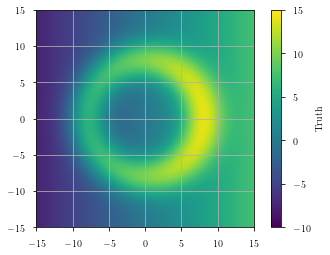

In [4]:
# coordinate grid
xgrid, ygrid = np.mgrid[-15:15:100j, -15:15:100j]
extent = [xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()]
grid_pos = np.vstack((xgrid.flatten(), ygrid.flatten())).T

# plot "truth"
true_data = truth(grid_pos)
plt.imshow(true_data.reshape(xgrid.shape).T, origin='lower', extent=extent, vmin=-10, vmax=15)
plt.colorbar(label="Truth")

In [5]:
# randomly sample observations of the "true" field
obs_pos = np.random.uniform(-15.0, 15.0, size=(1000, 2))
obs_data = truth(obs_pos)

# add some Gaussian noise that increases radially
radius = np.sqrt(np.sum(obs_pos**2.0, axis=1))
e_obs_data = 1.0 + 0.2*radius
obs_data += e_obs_data * np.random.randn(len(obs_data))

## Universal Kriging

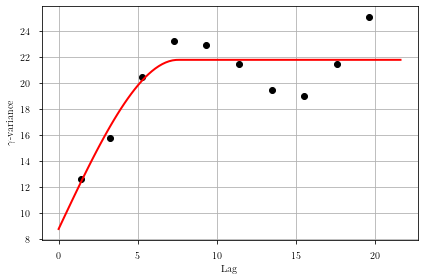

In [6]:
# universal kriging (deg=1)
krig = kriging.Kriging(obs_pos, obs_data, e_obs_data=e_obs_data)
variogram_fig = krig.fit(
    model="spherical", deg=1, nbins=10, bin_number=False, lag_cutoff=0.5)
interp_data, interp_var = krig.interp(grid_pos)

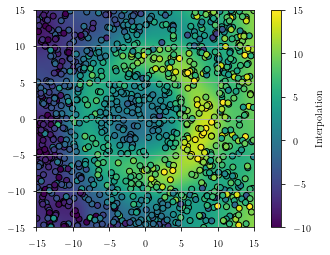

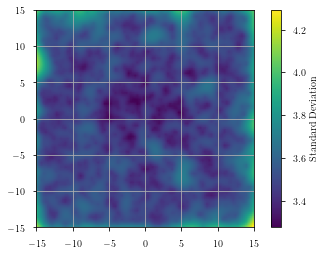

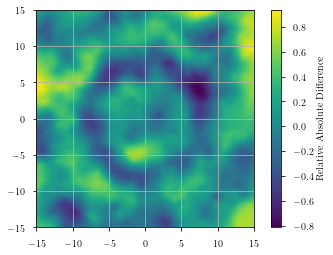

In [7]:
# plot interpolation
plt.imshow(interp_data.reshape(xgrid.shape).T, origin='lower', extent=extent, vmin=-10.0, vmax=15.0)
plt.scatter(obs_pos[:, 0], obs_pos[:, 1], c=obs_data, edgecolor='k', marker='o', vmin=-10.0, vmax=15.0)
plt.colorbar(label="Interpolation")
plt.show()

# plot standard deviation
interp_std = np.sqrt(interp_var)
plt.imshow(interp_std.reshape(xgrid.shape).T, origin='lower', extent=extent)
plt.colorbar(label="Standard Deviation")
plt.show()

# plot difference between interpolation and truth relative to standard deviation
plt.imshow(((interp_data - true_data)/interp_std).reshape(xgrid.shape).T, origin='lower', extent=extent)
plt.colorbar(label="Relative Absolute Difference")
plt.show()